In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import seaborn as sns
import glob
import os
import openpyxl
import xlrd

In [21]:
import matplotlib

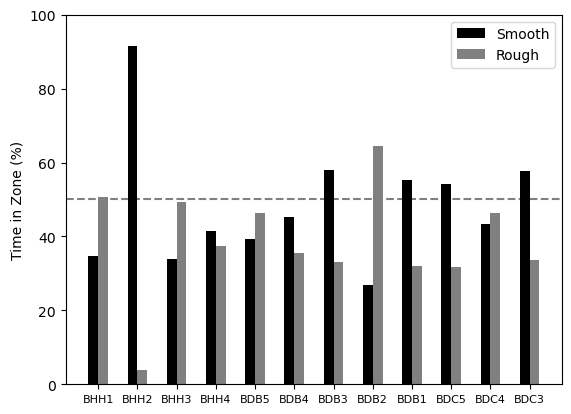

In [6]:
## choose file
file = r"N:\Liu_Custer\Innate_Perference_BHHs\InnateTexturePerference_20241015\Export Files\Statistics-InnateTexturePerference_20241015.xls"
file2 = r"N:\Liu_Custer\Innate_Perference_BDCs_BDBs\Statistics_13_14_15\Statistics-InnateTexturePerference_20240515.xlsx"
## read data
data = pd.read_excel(file,header=[0,1,2,3],index_col=0)
data2 = pd.read_excel(file2,header=[0,1,2,3],index_col=0)

## extract columns of interest
smooth_perc = data['In zone']['Smooth / Center-point']['Cumulative Duration']['s']/900 * 100
smooth_perc2 = data2['In zone']['Smooth / Center-point']['Cumulative Duration']['s']/900 * 100
rough_perc = data['In zone']['Rough / Center-point']['Cumulative Duration']['s']/900 * 100
rough_perc2 = data2['In zone']['Rough / Center-point']['Cumulative Duration']['s']/900 * 100
mouse_ids = np.array(data['MouseID']).reshape(-1)
mouse_ids2 = np.array(data2['MouseID']).reshape(-1)

## plot

numMice = len(data.index)+len(data2.index)
xaxis = np.arange(numMice)
ax = plt.axes()

## Modify the x position of the 9th bar for both smooth_perc and rough_perc
# ax.bar(xaxis - 0.25 + (xaxis == 8) * 0.3, smooth_perc, width=0.25, align='edge', color='k', label='Smooth')
# ax.bar(xaxis + (xaxis == 8) * 0.3, rough_perc, width=0.25, align='edge', color='gray', label='Rough')

ax.bar(xaxis-0.25,np.concatenate([smooth_perc,smooth_perc2]),width=0.25,align='edge',color='k',label='Smooth')
ax.bar(xaxis,np.concatenate([rough_perc,rough_perc2]),width=0.25,align='edge',color='gray',label='Rough')
ax.set_xticks(np.arange(numMice))
ax.set_xticklabels(np.concatenate([mouse_ids,mouse_ids2]), fontsize=8)
ax.axhline(50,color='gray',linestyle='--',zorder=-1)
ax.set_ylim([0,100])
ax.legend()
ax.set_ylabel('Time in Zone (%)')

# Extract the file
filename = os.path.splitext(os.path.basename(file))[0]
# save_path = fr'C:\Users\custe\Emory\SOM Emanuel Lab - General\Liu_Custer\Data Graph\InnatePerference\{filename}bar_plot.pdf'
# plt.savefig(save_path, dpi=600, bbox_inches='tight', transparent=True)
plt.show()

meta NOT subset; don't know how to subset; dropped


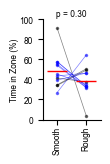

In [85]:
origSize = matplotlib.rcParams['font.size']
matplotlib.rcParams.update({'font.size': 6})
matplotlib.rcParams.update({'pdf.fonttype': 42})
matplotlib.rcParams.update({'ps.fonttype': 42})
matplotlib.rcParams.update({'font.family': 'Arial'})
plt.figure(figsize=[0.75,1.3])

allSmooth = np.concatenate([smooth_perc,smooth_perc2])
allRough = np.concatenate([rough_perc,rough_perc2])

ax = plt.axes()
ax.plot(np.array([smooth_perc,rough_perc]),'.-',lw=0.5,markersize=3,color='k',alpha=0.5)
ax.plot(np.array([smooth_perc2,rough_perc2]),'.-',lw=0.5,markersize=3,color='b',alpha=0.5)
ax.plot([0,1],[allSmooth.mean(),allRough.mean()],'_',ms=15,color='r')
ax.set_ylim([0,100])
ax.set_xlim([-0.5,1.5])
ax.set_xticks([0,1])
ax.set_xticklabels(['Smooth','Rough'], rotation=90,ha='center',va='top')
ax.xaxis.set_tick_params(pad=1)
ax.set_ylabel('Time in Zone (%)',labelpad=0)
sns.despine()
ax.text(0.5,101,'p = 0.30',ha='center',va='bottom',fontsize=6)

matplotlib.rcParams.update({'font.size': origSize})

plt.savefig(r'C:\Users\ajemanu\OneDrive - Emory University\1 - Lab\Grants\202411 R00 RPPR\InnatePreference_NoDrug.pdf',dpi=600,bbox_inches='tight',transparent=True)

In [25]:
import scipy.stats
scipy.stats.ttest_rel(np.concatenate([smooth_perc,smooth_perc2]),np.concatenate([rough_perc,rough_perc2]))  # paired t-test

TtestResult(statistic=1.0759528468041515, pvalue=0.3049810144296784, df=11)

In [5]:
data['In zone'].mean()

Rough / Center-point   Mean                 s                        6.316097
                       Frequency            Unnamed: 11_level_3     50.750000
                       Cumulative Duration  s                      317.840000
                                            %                       34.385320
Smooth / Center-point  Mean                 s                        9.881395
                       Frequency            Unnamed: 15_level_3     47.500000
                       Cumulative Duration  s                      453.380000
                                            %                       48.892275
dtype: float64

In [17]:
data.keys()

MultiIndex([(  'Distance moved',                     'Center-point', ...),
            (        'Velocity',                     'Center-point', ...),
            (    'Acceleration',                     'Center-point', ...),
            (    'Acceleration',                     'Center-point', ...),
            (    'Acceleration',                     'Center-point', ...),
            ('Zone alternation',      'Center-point / Alternations', ...),
            ('Zone alternation',  'Center-point / Max alternations', ...),
            ('Zone alternation',   'Center-point / Direct revisits', ...),
            ('Zone alternation', 'Center-point / Indirect revisits', ...),
            (         'In zone',             'Rough / Center-point', ...),
            (         'In zone',             'Rough / Center-point', ...),
            (         'In zone',             'Rough / Center-point', ...),
            (         'In zone',             'Rough / Center-point', ...),
            (         'In

In [18]:
print(data.columns)


MultiIndex([(  'Distance moved',                     'Center-point', ...),
            (        'Velocity',                     'Center-point', ...),
            (    'Acceleration',                     'Center-point', ...),
            (    'Acceleration',                     'Center-point', ...),
            (    'Acceleration',                     'Center-point', ...),
            ('Zone alternation',      'Center-point / Alternations', ...),
            ('Zone alternation',  'Center-point / Max alternations', ...),
            ('Zone alternation',   'Center-point / Direct revisits', ...),
            ('Zone alternation', 'Center-point / Indirect revisits', ...),
            (         'In zone',             'Rough / Center-point', ...),
            (         'In zone',             'Rough / Center-point', ...),
            (         'In zone',             'Rough / Center-point', ...),
            (         'In zone',             'Rough / Center-point', ...),
            (         'In

In [19]:
print(data.head())

            Distance moved     Velocity Acceleration                      \
              Center-point Center-point Center-point                       
                     Total         Mean      Minimum      Mean   Maximum   
                        cm         cm/s        cm/s²     cm/s²     cm/s²   
Trial     1        6240.37      6.82904     -883.260  0.001373  1134.920   
Trial     2        3283.52      3.53249    -1006.220 -0.001801  1296.270   
Trial     3        4553.34      4.89859     -902.253  0.021702   879.321   
Trial     4        3804.61      4.09309     -560.092  0.000221   837.268   

                       Zone alternation                                  \
            Center-point / Alternations Center-point / Max alternations   
                              Frequency                       Frequency   
                     Unnamed: 6_level_3              Unnamed: 7_level_3   
Trial     1                          86                              92   
Trial     2     

In [20]:
# Example for accessing MultiIndex columns
print(data.loc[:, ('MouseID', 'Unnamed: 19_level_1', 'Unnamed: 19_level_2', 'Unnamed: 19_level_3')])


Trial     1    BHH1
Trial     2    BHH2
Trial     3    BHH3
Trial     4    BHH4
Name: (MouseID, Unnamed: 19_level_1, Unnamed: 19_level_2, Unnamed: 19_level_3), dtype: object


In [21]:
data['MouseID']['Unnamed: 19_level_1']['Unnamed: 19_level_2']['Unnamed: 19_level_3']

Trial     1    BHH1
Trial     2    BHH2
Trial     3    BHH3
Trial     4    BHH4
Name: Unnamed: 19_level_3, dtype: object

In [22]:
data['Substance']['Unnamed: 18_level_1']['Unnamed: 18_level_2']['Unnamed: 18_level_3']

Trial     1    N
Trial     2    N
Trial     3    N
Trial     4    N
Name: Unnamed: 18_level_3, dtype: object

In [23]:
#sns.barplot(data=data,x=data['Substance']['Unnamed: 16_level_1']['Unnamed: 16_level_2']['Unnamed: 16_level_3'],y=data['In zone']['Smooth / Center-point']['Cumulative Duration']['s'])
sns.barplot(data=data,x=data['Substance']['Unnamed: 15_level_1']['Unnamed: 15_level_2']['Unnamed: 15_level_3'],y=data['In zone']['Rough / Center-point']['Cumulative Duration']['s'])

KeyError: 'Unnamed: 15_level_1'

In [10]:
#sns.barplot(data=data,x=data['Substance']['Unnamed: 16_level_1']['Unnamed: 16_level_2']['Unnamed: 16_level_3'],y=data['In zone']['Smooth / Center-point']['Cumulative Duration']['s'])
sns.barplot(data=data,x=data['MouseID']['Unnamed: 16_level_1']['Unnamed: 16_level_2']['Unnamed: 16_level_3'],y=data['In zone']['Rough / Center-point']['Cumulative Duration']['s'])

KeyError: 'Unnamed: 16_level_1'

In [24]:
data['Substance']

,Unnamed: 18_level_1
,Unnamed: 18_level_2
,Unnamed: 18_level_3
Trial 1,N
Trial 2,N
Trial 3,N
Trial 4,N


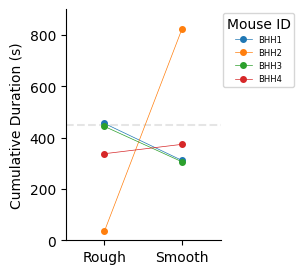

In [25]:
plt.figure(figsize=[2,3])
plt.plot(np.arange(2), np.array([data[('In zone','Rough / Center-point','Cumulative Duration','s')],data[('In zone','Smooth / Center-point','Cumulative Duration','s')]]),markersize=4,marker='o',lw=0.5,label= mouse_ids)
plt.xticks(np.arange(2),['Rough','Smooth'])
plt.xlim([-0.5,1.5])
plt.ylabel('Cumulative Duration (s)')
plt.ylim([0,900])
plt.axhline(450,color='gray',linestyle='--',zorder=-1,alpha=0.2)
plt.legend(bbox_to_anchor=[1.0, 0.5, 0.5, 0.5], title='Mouse ID', fontsize=6)
sns.despine()

filename = os.path.splitext(os.path.basename(file))[0]
save_path = fr'C:\Users\custe\Emory\SOM Emanuel Lab - General\Liu_Custer\Data Graph\InnatePerference\{filename}dot_plot.jpg'
plt.savefig(save_path, dpi=1200, bbox_inches='tight', transparent=True)
plt.show()

C:\Users\custe\AppData\Local\Temp\ipykernel_17508\1436389537.py:12: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(bbox_to_anchor=[1.0, 0.5, 0.5, 0.5], title='Mouse ID', fontsize=6)


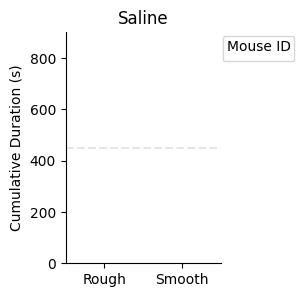

C:\Users\custe\AppData\Local\Temp\ipykernel_17508\1436389537.py:37: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(bbox_to_anchor=[1.0, 0.5, 0.5, 0.5], title='Mouse ID', fontsize=6)


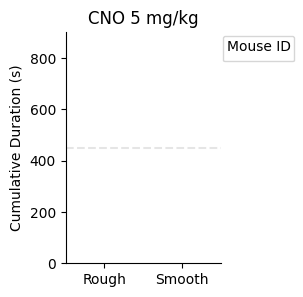

In [26]:
index = data['Substance']['Unnamed: 18_level_1']['Unnamed: 18_level_2']['Unnamed: 18_level_3'] == 'D' ## select only saline data

plt.figure(figsize=[2,3])

for i, mouse_id in enumerate(data['MouseID'][index].values):
    # Extract and plot data for each mouse ID
    plt.plot(np.arange(2), [
        data[('In zone', 'Rough / Center-point', 'Cumulative Duration', 's')][index][i],
        data[('In zone', 'Smooth / Center-point', 'Cumulative Duration', 's')][index][i]
    ], markersize=4, marker='o', lw=0.5, label=f'{mouse_id[0]}')

plt.legend(bbox_to_anchor=[1.0, 0.5, 0.5, 0.5], title='Mouse ID', fontsize=6)
#plt.plot(np.arange(2), np.array([data[('In zone','Rough / Center-point','Cumulative Duration','s')][index],data[('In zone','Smooth / Center-point','Cumulative Duration','s')][index]]),markersize=4,marker='o',lw=0.5)
plt.xticks(np.arange(2),['Rough','Smooth'])
plt.xlim([-0.5,1.5])
plt.ylabel('Cumulative Duration (s)')
plt.ylim([0,900])
plt.axhline(450,color='gray',linestyle='--',zorder=-1,alpha=0.2)
sns.despine()
plt.title('Saline')

save_path = fr'C:\Users\custe\Emory\SOM Emanuel Lab - General\Liu_Custer\Data Graph\InnatePerference\{filename}Saline_dot_plot.pdf'
plt.savefig(save_path, dpi=600, bbox_inches='tight', transparent=True)
plt.show()

index = data['Substance']['Unnamed: 18_level_1']['Unnamed: 18_level_2']['Unnamed: 18_level_3'] == 'A' ## select only CNO data
mouse_ids= data['MouseID'][index].values

plt.figure(figsize=[2,3])

for i, mouse_id in enumerate(data['MouseID'][index].values):
    plt.plot(np.arange(2), [
        data[('In zone', 'Rough / Center-point', 'Cumulative Duration', 's')][index][i],
        data[('In zone', 'Smooth / Center-point', 'Cumulative Duration', 's')][index][i]
    ], markersize=4, marker='o', lw=0.5, label=f'{mouse_id[0]}')

plt.legend(bbox_to_anchor=[1.0, 0.5, 0.5, 0.5], title='Mouse ID', fontsize=6)
#plt.plot(np.arange(2), np.array([data[('In zone','Rough / Center-point','Cumulative Duration','s')][index],data[('In zone','Smooth / Center-point','Cumulative Duration','s')][index]]),markersize=4,marker='o',lw=0.5)
plt.xticks(np.arange(2),['Rough','Smooth'])
plt.xlim([-0.5,1.5])
plt.ylabel('Cumulative Duration (s)')
plt.ylim([0,900])
plt.axhline(450,color='gray',linestyle='--',zorder=-1,alpha=0.2)
sns.despine()
plt.title(r'CNO 5 mg/kg')

save_path = fr'C:\Users\custe\Emory\SOM Emanuel Lab - General\Liu_Custer\Data Graph\InnatePerference\{filename}CNO_dot_plot.pdf'
plt.savefig(save_path, dpi=600, bbox_inches='tight', transparent=True)
plt.show()

redo the sheet - combine them together - reexport files- percentage of rough vs smooth

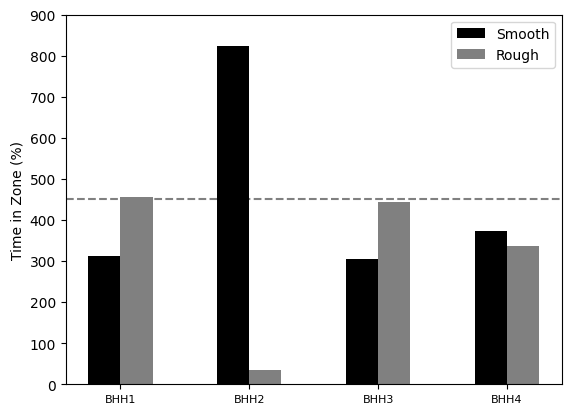

In [27]:
## choose file - Control Group
file = r"N:\Liu_Custer\Innate_Perference_BHHs\InnateTexturePerference_20241015\Export Files\Statistics-InnateTexturePerference_20241015.xls"
## read data
data = pd.read_excel(file,header=[0,1,2,3],index_col=0)

## extract columns of interest
smooth_perc = data['In zone']['Smooth / Center-point']['Cumulative Duration']['s']
rough_perc = data['In zone']['Rough / Center-point']['Cumulative Duration']['s']
mouse_ids = np.array(data['MouseID']).reshape(-1)

## plot
xaxis = np.arange(len(data.index))
ax = plt.axes()

## Modify the x position of the 9th bar for both smooth_perc and rough_perc
# ax.bar(xaxis - 0.25 + (xaxis == 8) * 0.3, smooth_perc, width=0.25, align='edge', color='k', label='Smooth')
# ax.bar(xaxis + (xaxis == 8) * 0.3, rough_perc, width=0.25, align='edge', color='gray', label='Rough')

ax.bar(xaxis-0.25,smooth_perc,width=0.25,align='edge',color='k',label='Smooth')
ax.bar(xaxis,rough_perc,width=0.25,align='edge',color='gray',label='Rough')
ax.set_xticks(np.arange(len(data.index)))
ax.set_xticklabels(mouse_ids, fontsize=8)
ax.axhline(7.5*60,color='gray',linestyle='--',zorder=-1)
ax.set_ylim([0,15 * 60])
ax.legend()
ax.set_ylabel('Time in Zone (%)')

# Extract the file
filename = os.path.splitext(os.path.basename(file))[0]
save_path = fr'C:\Users\custe\Emory\SOM Emanuel Lab - General\Liu_Custer\Data Graph\InnatePerference\{filename}bar_plot.jpg'
plt.savefig(save_path, dpi=1200, bbox_inches='tight', transparent=True)
plt.show()

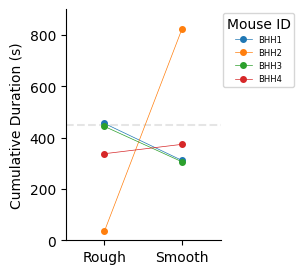

In [28]:
plt.figure(figsize=[2,3])
plt.plot(np.arange(2), np.array([data[('In zone','Rough / Center-point','Cumulative Duration','s')],data[('In zone','Smooth / Center-point','Cumulative Duration','s')]]),markersize=4,marker='o',lw=0.5,label= mouse_ids)
plt.xticks(np.arange(2),['Rough','Smooth'])
plt.xlim([-0.5,1.5])
plt.ylabel('Cumulative Duration (s)')
plt.ylim([0,900])
plt.axhline(450,color='gray',linestyle='--',zorder=-1,alpha=0.2)
plt.legend(bbox_to_anchor=[1.0, 0.5, 0.5, 0.5], title='Mouse ID', fontsize=6)
sns.despine()

filename = os.path.splitext(os.path.basename(file))[0]
save_path = fr'C:\Users\custe\Emory\SOM Emanuel Lab - General\Liu_Custer\Data Graph\InnatePerference\{filename}dot_plot.pdf'
plt.savefig(save_path, dpi=1200, bbox_inches='tight', transparent=True)
plt.show()

C:\Users\custe\AppData\Local\Temp\ipykernel_17508\2702799496.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  data[('In zone', 'Rough / Center-point', 'Cumulative Duration', 's')][index][i],
C:\Users\custe\AppData\Local\Temp\ipykernel_17508\2702799496.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  data[('In zone', 'Smooth / Center-point', 'Cumulative Duration', 's')][index][i]


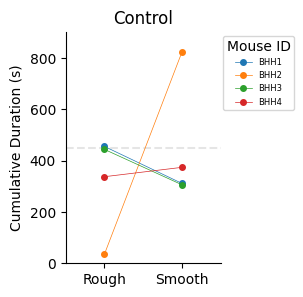

In [29]:
index = data['Substance']['Unnamed: 18_level_1']['Unnamed: 18_level_2']['Unnamed: 18_level_3'] == 'N'
mouse_ids= data['MouseID'][index].values

plt.figure(figsize=[2,3])

for i, mouse_id in enumerate(data['MouseID'][index].values):
    plt.plot(np.arange(2), [
        data[('In zone', 'Rough / Center-point', 'Cumulative Duration', 's')][index][i],
        data[('In zone', 'Smooth / Center-point', 'Cumulative Duration', 's')][index][i]
    ], markersize=4, marker='o', lw=0.5, label=f'{mouse_id[0]}')

plt.legend(bbox_to_anchor=[1.0, 0.5, 0.5, 0.5], title='Mouse ID', fontsize=6)
#plt.plot(np.arange(2), np.array([data[('In zone','Rough / Center-point','Cumulative Duration','s')][index],data[('In zone','Smooth / Center-point','Cumulative Duration','s')][index]]),markersize=4,marker='o',lw=0.5)
plt.xticks(np.arange(2),['Rough','Smooth'])
plt.xlim([-0.5,1.5])
plt.ylabel('Cumulative Duration (s)')
plt.ylim([0,900])
plt.axhline(450,color='gray',linestyle='--',zorder=-1,alpha=0.2)
sns.despine()
plt.title(r'Control')

save_path = fr'C:\Users\custe\Emory\SOM Emanuel Lab - General\Liu_Custer\Data Graph\InnatePerference\{filename}Control_dot_plot.jpg'
plt.savefig(save_path, dpi=600, bbox_inches='tight', transparent=True)
plt.show()

In [30]:
data['Substance']['Unnamed: 18_level_1']['Unnamed: 18_level_2']['Unnamed: 18_level_3']

Trial     1    N
Trial     2    N
Trial     3    N
Trial     4    N
Name: Unnamed: 18_level_3, dtype: object

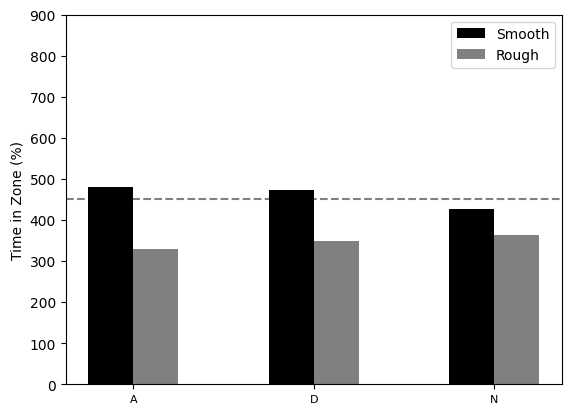

In [31]:
#Average trials bar plot

folder_path = r'C:\Users\custe\Emory\SOM Emanuel Lab - General\Liu_Custer\Innate_Perference_BDCs_BDBs\Statistics_13_14_15'
excel_files = glob.glob(os.path.join(folder_path, "*.xlsx"))

all_smooth_durations = []
all_rough_durations = []
all_substances = []

for file in excel_files:
    data = pd.read_excel(file, header=[0, 1, 2, 3], index_col=0)
    
    smooth_duration = data['In zone']['Smooth / Center-point']['Cumulative Duration']['s']
    rough_duration = data['In zone']['Rough / Center-point']['Cumulative Duration']['s']
    substances = data['Substance'].iloc[:, 0]
    
    # Append data
    all_smooth_durations.extend(smooth_duration)
    all_rough_durations.extend(rough_duration)
    all_substances.extend(substances)

# DataFrame from the aggregated data
agg_data = pd.DataFrame({
    'Substance': all_substances,
    'Smooth_Duration': all_smooth_durations,
    'Rough_Duration': all_rough_durations
})

# Group by substance and calculate the mean
grouped_data = agg_data.groupby('Substance').mean()

# Extract averaged columns
avg_smooth_perc = grouped_data['Smooth_Duration']
avg_rough_perc = grouped_data['Rough_Duration']

file_dates = []
file_dates.extend([os.path.basename(file).split('_')[0]] * len(smooth_duration))  # Extract date from filename

xaxis = np.arange(len(avg_smooth_perc.index))
fig, ax = plt.subplots()

# Bar graph
ax.bar(xaxis - 0.25, avg_smooth_perc, width=0.25, align='edge', color='k', label='Smooth')
ax.bar(xaxis, avg_rough_perc, width=0.25, align='edge', color='gray', label='Rough')
ax.set_xticks(np.arange(len(avg_smooth_perc.index)))
ax.set_xticklabels(avg_smooth_perc.index, fontsize=8)
ax.axhline(7.5 * 60, color='gray', linestyle='--', zorder=-1)
ax.set_ylim([0, 15 * 60])
ax.legend()
ax.set_ylabel('Time in Zone (%)')

folder_path = fr'C:\Users\custe\Emory\SOM Emanuel Lab - General\Liu_Custer\Data Graph\InnatePerference'
save_path = os.path.join(folder_path, 'Mean_bar_plot.pdf')
plt.savefig(save_path, dpi=600, bbox_inches='tight', transparent=True)
plt.show()


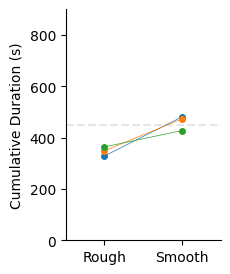

In [32]:
# Dot plot

agg_data = pd.DataFrame({
    'Substance': all_substances,
    'Smooth_Duration': all_smooth_durations,
    'Rough_Duration': all_rough_durations,
})

plt.figure(figsize=[2, 3])
plt.plot(
    np.arange(2), 
    np.array([avg_rough_perc.values, avg_smooth_perc.values]), 
    markersize=4, marker='o', lw=0.5
)
plt.xticks(np.arange(2), ['Rough', 'Smooth'])
plt.xlim([-0.5, 1.5])
plt.ylabel('Cumulative Duration (s)')
plt.ylim([0, 900])
plt.axhline(450, color='gray', linestyle='--', zorder=-1, alpha=0.2)
sns.despine()
ax.legend(title='Experiment Date',fontsize=6)

# Annotate each dot with the file date
# for i, date in enumerate(avg_smooth_perc.index):
#     plt.text(i, avg_rough_perc[i], date, ha='center', va='bottom', fontsize=8, color='gray')
#     plt.text(i, avg_smooth_perc[i], date, ha='center', va='bottom', fontsize=8, color='k')

folder_path = fr'C:\Users\custe\Emory\SOM Emanuel Lab - General\Liu_Custer\Data Graph\InnatePerference'
save_path = os.path.join(folder_path, 'Mean_dot_plot.pdf')
plt.savefig(save_path, dpi=600, bbox_inches='tight', transparent=True)
plt.show()

In [33]:
import scipy
import statistics

In [34]:
data['Substance']['Unnamed: 18_level_1']['Unnamed: 18_level_2']['Unnamed: 18_level_3'] == 'N'

Trial     1    True
Trial     2    True
Trial     3    True
Trial     4    True
Trial     5    True
Trial     6    True
Trial     7    True
Trial     8    True
Name: Unnamed: 18_level_3, dtype: bool

In [35]:
avg_smooth_perc = grouped_data['Smooth_Duration']
avg_rough_perc = grouped_data['Rough_Duration']

In [36]:
print(avg_rough_perc)
print(avg_smooth_perc)

Substance
A    328.297875
D    348.631111
N    363.745000
Name: Rough_Duration, dtype: float64
Substance
A    480.516375
D    472.945556
N    427.445000
Name: Smooth_Duration, dtype: float64


In [37]:
len(smooth_perc)

4

In [38]:
print(statistics.mean(rough_perc))
print(statistics.mean(smooth_perc))

avg_rough_perc_N = statistics.mean(rough_perc)
avg_smooth_perc_N = statistics.mean(smooth_perc)

scipy.stats.ttest_rel(rough_perc,smooth_perc)#df = 8 - probelmatic

317.84
453.38


TtestResult(statistic=-0.6123879921908815, pvalue=0.5835737760493898, df=3)